### This is a sales dataset from kaggle. I want to perform data preprocessing and visualization to give the company reports about the sales of their products, profits and the countries with highest markets.
### This a really good start for me to practice my EDA skills and get it done as a project for my portfolio

In [1]:
!pip install missingno

In [2]:
##### Import the necessary libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
#### Load the dataset 
df = pd.read_csv(r"C:\Users\User Pc\Desktop\DataScience_learn\dataset\Financials.csv")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [4]:
### Sanity check
df.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


In [5]:
df.tail(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
690,Government,United States of America,VTT,High,$267.00,$250.00,$20.00,"$5,340.00",$801.00,"$4,539.00","$2,670.00","$1,869.00",01/10/2013,10,October,2013
691,Midmarket,Germany,VTT,High,"$1,175.00",$250.00,$15.00,"$17,625.00","$2,643.75","$14,981.25","$11,750.00","$3,231.25",01/10/2014,10,October,2014
692,Enterprise,Canada,VTT,High,"$2,954.00",$250.00,$125.00,"$3,69,250.00","$55,387.50","$3,13,862.50","$3,54,480.00","$(40,617.50)",01/11/2013,11,November,2013
693,Enterprise,Germany,VTT,High,$552.00,$250.00,$125.00,"$69,000.00","$10,350.00","$58,650.00","$66,240.00","$(7,590.00)",01/11/2014,11,November,2014
694,Government,France,VTT,High,$293.00,$250.00,$20.00,"$5,860.00",$879.00,"$4,981.00","$2,930.00","$2,051.00",01/12/2014,12,December,2014
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


In [6]:
### The dataset has 700 rows and 16 columns
df.shape

(700, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [8]:
## No null values in the dataset
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

##### Data wrangling / preprocessing

In [9]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [10]:
df['Profit'] ### The error is a result of the empty spaces in the column names. We need to strip the whitespace

KeyError: 'Profit'

In [11]:
### Strip the whitespace in the column names 
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [12]:
col = ['Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit']

for i in col:
    ## remove non numeric characters
    df[i] = df[i].str.replace(r'[^\d.]', '', regex=True)
    
    df[i] = df[i].replace('', np.nan)
    ## change the dtype
    df[i] = df[i].astype('float')

df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [13]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [14]:
df.drop(columns=['Month Number', 'Year'], axis=1, inplace = True)

In [15]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Name
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,January
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,January
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,June
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,June
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,June


In [16]:
df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  5
Date                    0
Month Name              0
dtype: int64

<Axes: >

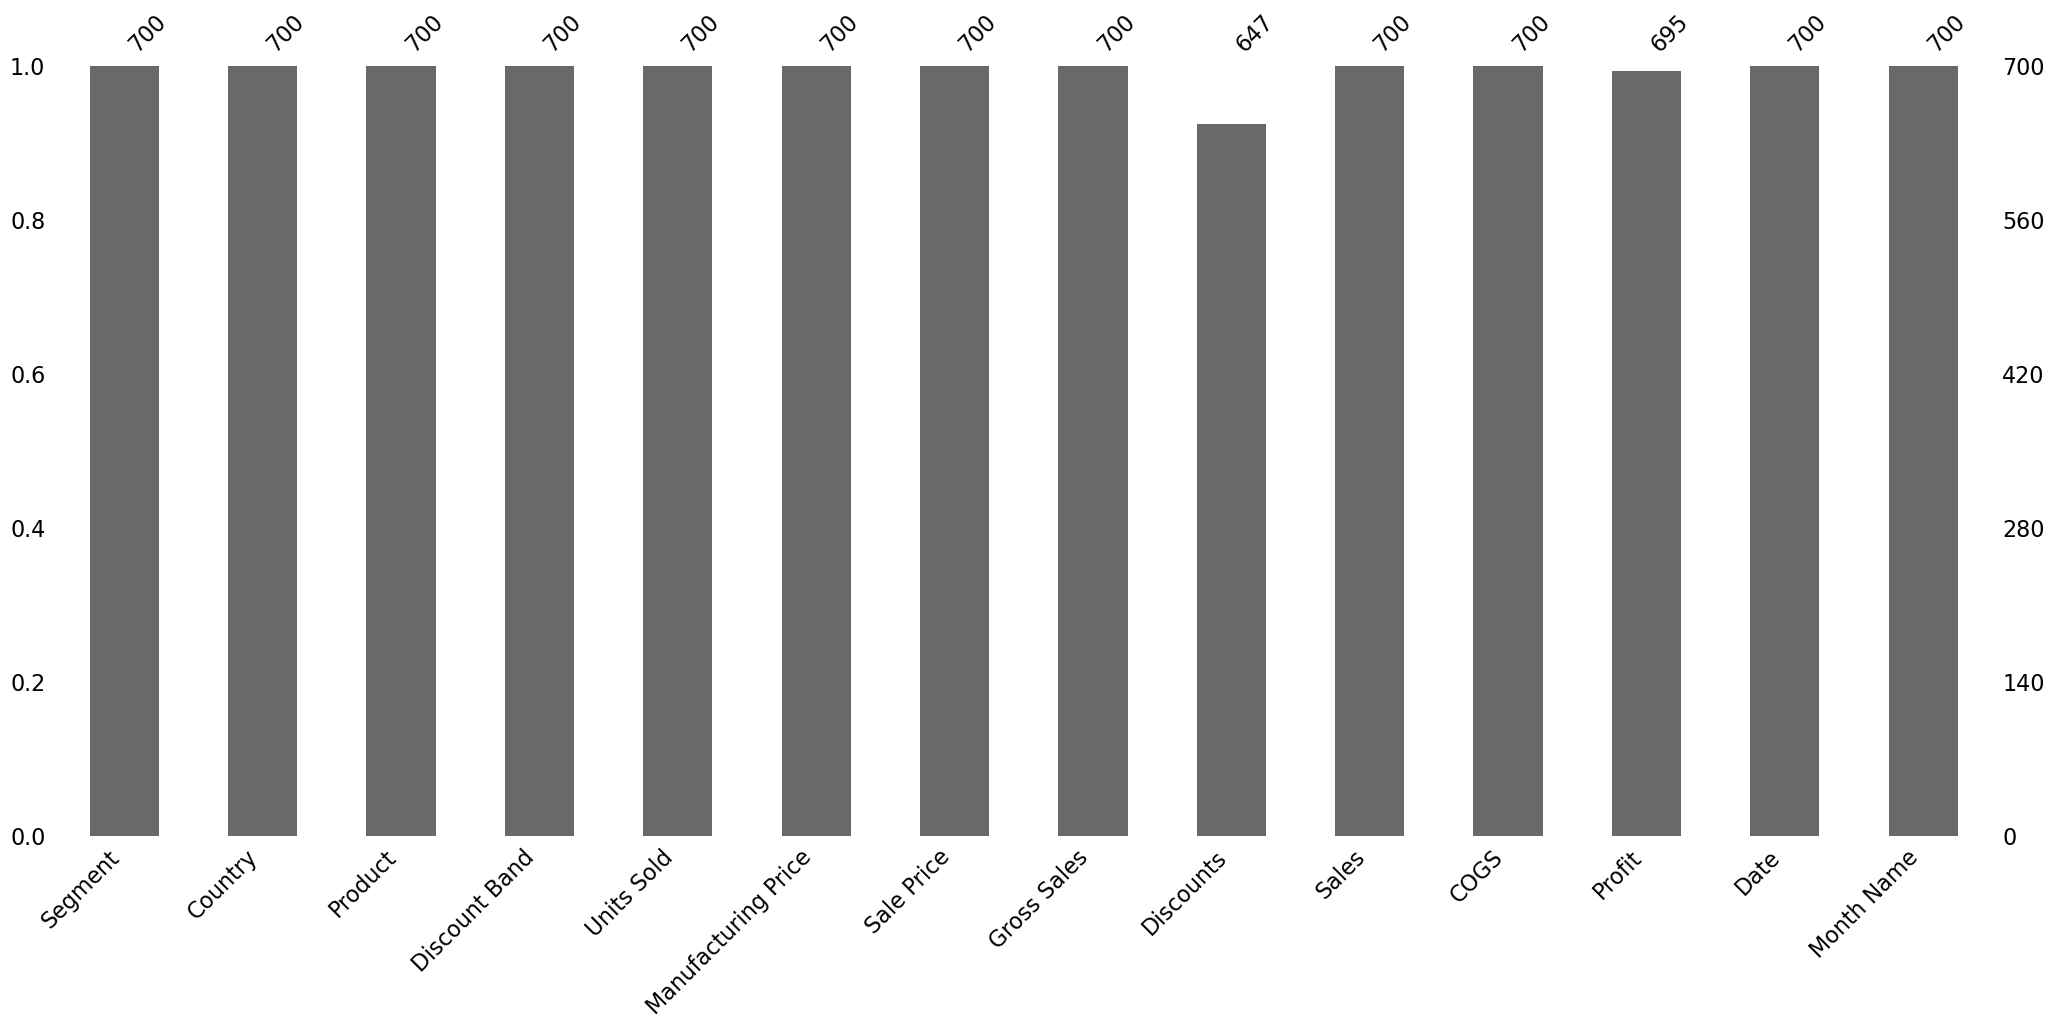

In [17]:
msno.bar(df)

[]

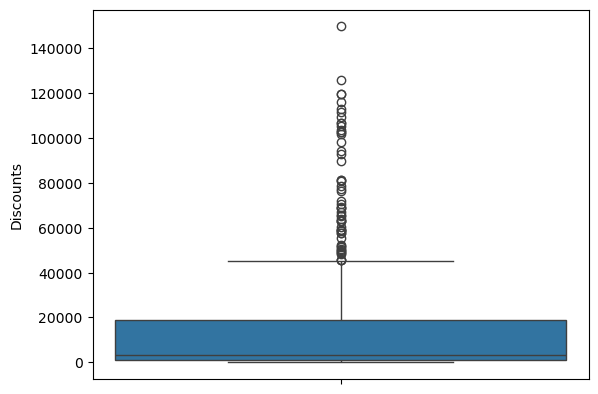

In [18]:
## Disccount column has outliers therefore we cannot fill null values with mean
sns.boxplot(df['Discounts'])
plt.plot()

[]

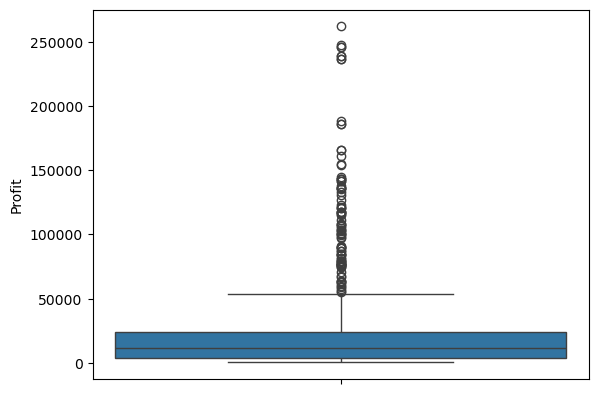

In [19]:
## Profit column also has outliers therefore we cannot fill missing values with mean
sns.boxplot(df['Profit'])
plt.plot()

In [20]:
## Fill null values with median
df[['Discounts','Profit']] = df[['Discounts','Profit']].fillna(df[['Discounts','Profit']].median())

In [21]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Name             0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               700 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Name           700 non-null    object 
dtypes: float64(8), object(6)
memory usage: 76.7+ KB


In [23]:
## convert the date column to the proper date format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Name           700 non-null  

In [24]:
### Handle outliers in the data
num_col = df.select_dtypes(include='number')
num_col

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
0,1618.5,3.0,20.0,32370.0,3108.00,32370.00,16185.0,16185.00
1,1321.0,3.0,20.0,26420.0,3108.00,26420.00,13210.0,13210.00
2,2178.0,3.0,15.0,32670.0,3108.00,32670.00,21780.0,10890.00
3,888.0,3.0,15.0,13320.0,3108.00,13320.00,8880.0,4440.00
4,2470.0,3.0,15.0,37050.0,3108.00,37050.00,24700.0,12350.00
...,...,...,...,...,...,...,...,...
695,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00
696,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00
697,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60
698,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85


In [25]:
cat_col = df.select_dtypes(include ='object')
cat_col

,Segment,Country,Product,Discount Band,Month Name
0,Government,Canada,Carretera,None,January
1,Government,Germany,Carretera,None,January
2,Midmarket,France,Carretera,None,June
3,Midmarket,Germany,Carretera,None,June
4,Midmarket,Mexico,Carretera,None,June
...,...,...,...,...,...
695,Small Business,France,Amarilla,High,March
696,Small Business,Mexico,Amarilla,High,October
697,Government,Mexico,Montana,High,February
698,Government,Canada,Paseo,High,April


[]

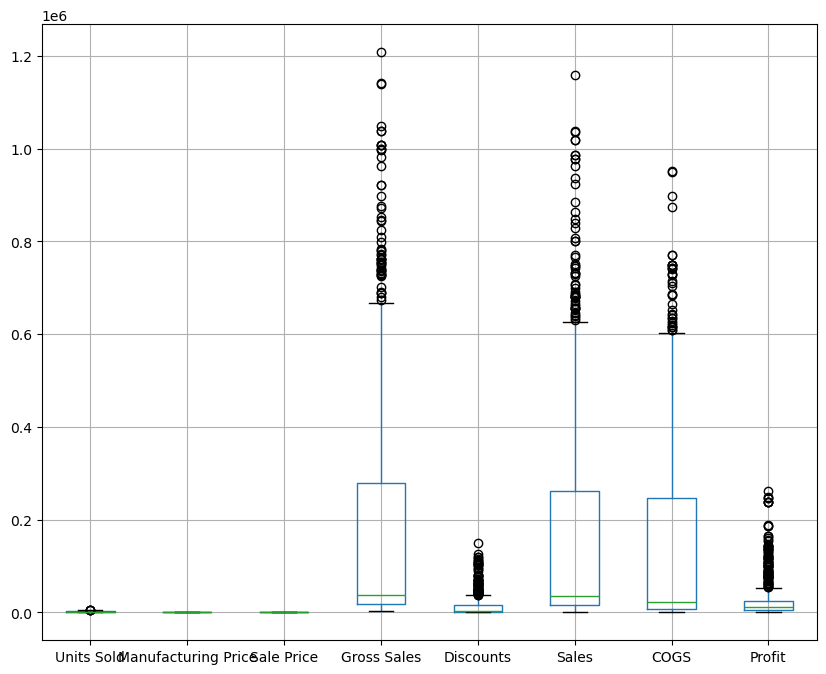

In [26]:
### Check all the columns with outliers
### Note that only numerical columns have outliers

num_col.boxplot(figsize = (10,8))
plt.plot()

***Observation from the chart above is that Units Sold Gross Sales, Discount, Sales,COGS & Profit have 0utliers***

In [27]:
df['Units Sold'].describe()

count     700.000000
mean     1608.294286
std       867.427859
min       200.000000
25%       905.000000
50%      1542.500000
75%      2229.125000
max      4492.500000
Name: Units Sold, dtype: float64

In [28]:
df['Units Sold'].quantile(0.25)

905.0

In [29]:
## Outlier Treatment
num_columns = num_col.columns
# upper and lower quatiles
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)

## Interquatile range
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

df[num_columns] = df[num_columns].clip(lower = lower_bound, upper = upper_bound, axis= 1)

[]

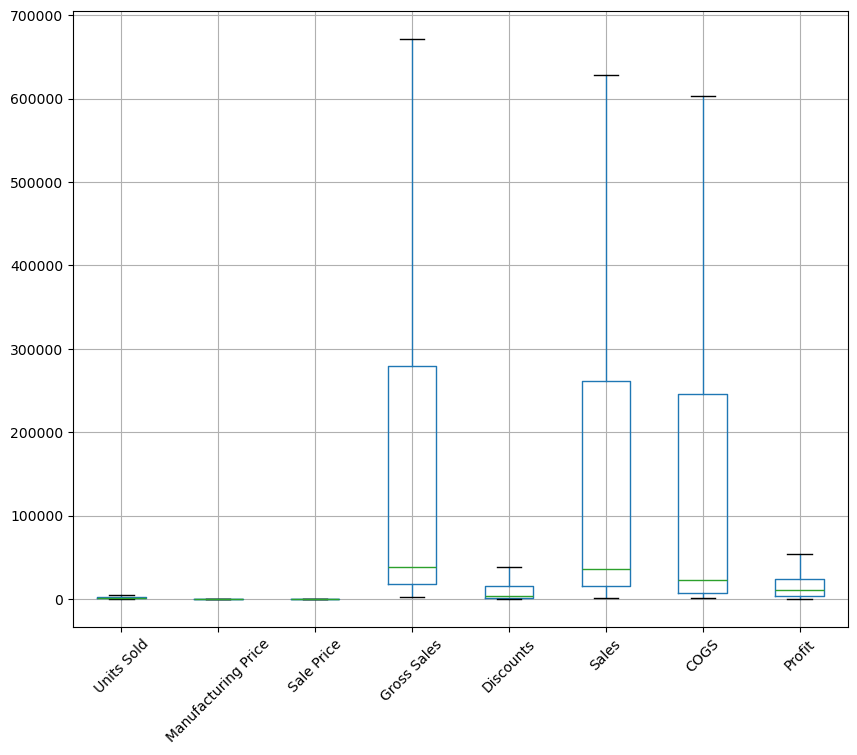

In [30]:
### We have removed outliers successifully
df.boxplot(figsize= (10,8))
plt.xticks(rotation = 45)
plt.plot()

In [31]:
## No duplicates
df.duplicated().sum()

0

### Data Visualization

In [32]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Name'],
      dtype='object')

***1. What is the product with the highest sales??***

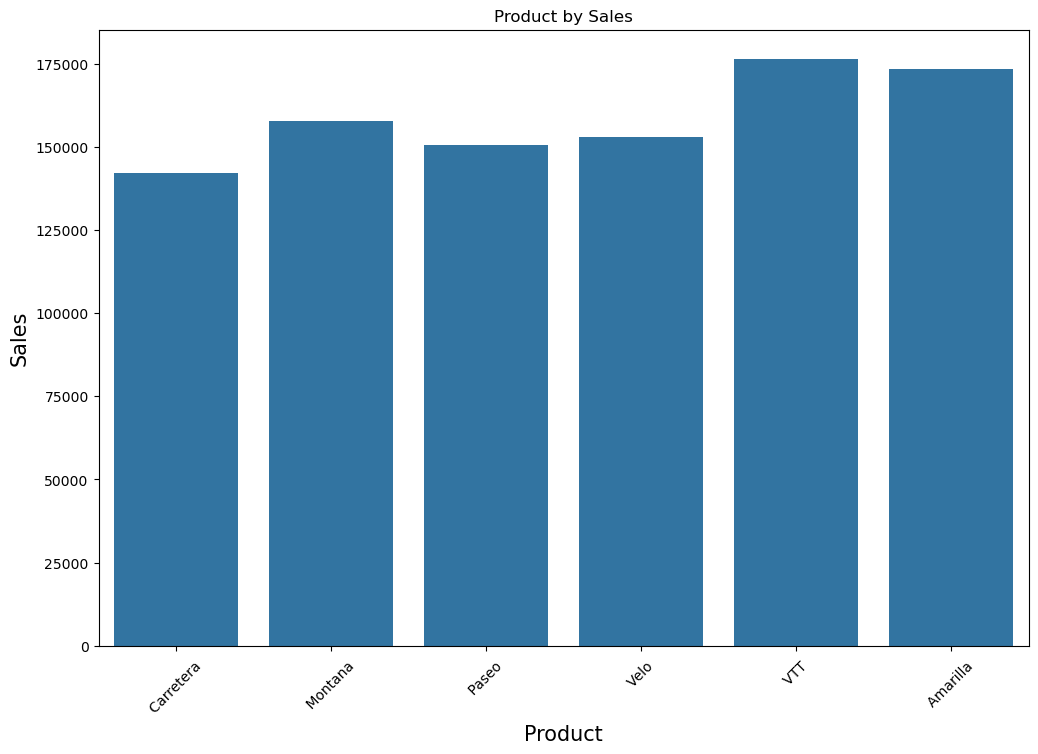

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product', y='Sales', data = df, errorbar = None)
plt.title('Product by Sales')
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***The above chart shows that VTT has the highest sales followed by Amarilla,Montana,Velo, Paseo and lastly Carretera. The company should perform a study to find out the reason behind high sales of VTT and Amarrilla and use it to increase the sales of the other products.***
***Conclusion is that VTT and Amarilla are the highest sources of revenue for the company***

***2. What is the product with the highest demand?***

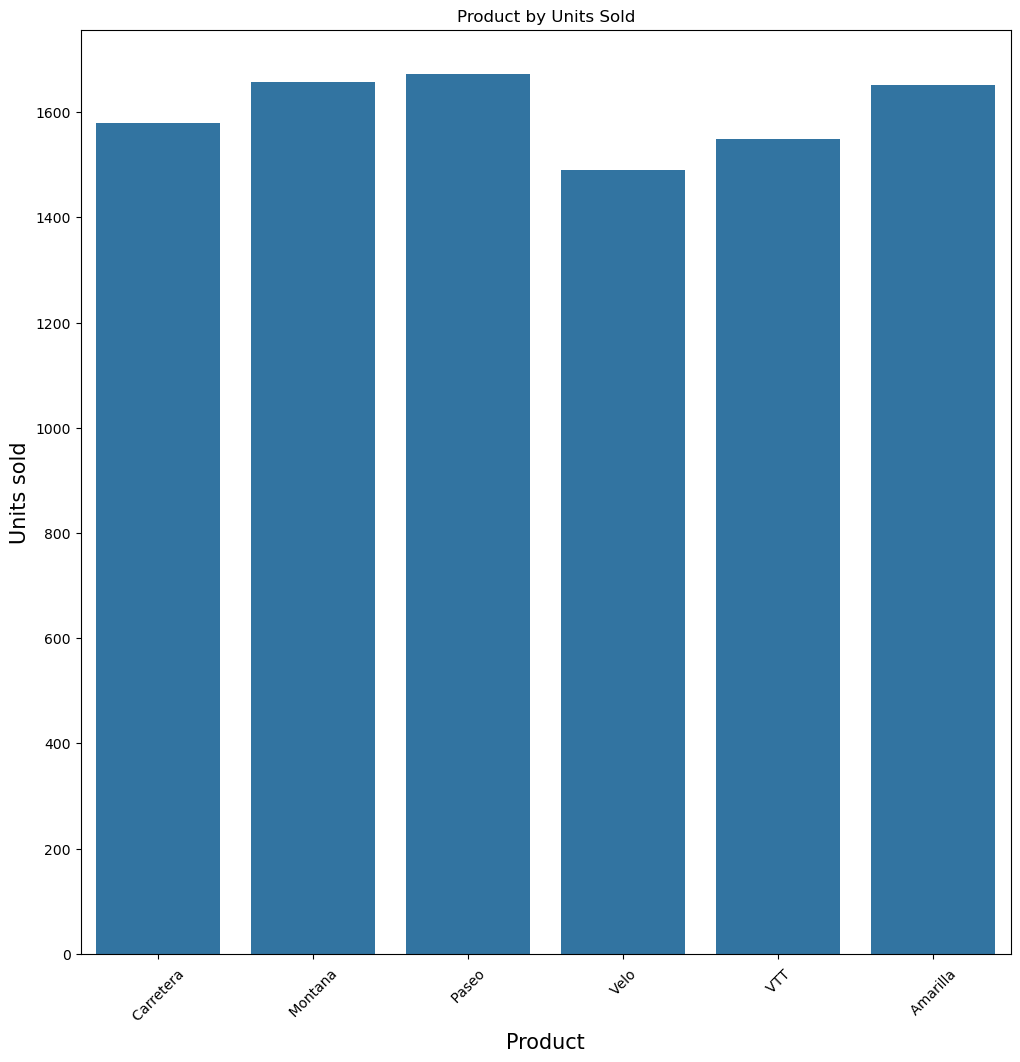

In [34]:
plt.figure(figsize=(12,12))
sns.barplot(x='Product', y='Units Sold', data = df, errorbar = None)
plt.title('Product by Units Sold')
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Units sold', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***We can observe that Paseo has the highest units of goods sold,Montana,Amarilla,Carretera, VTT and Velo. The company need to increase the production of Paseo and Montana since they have the highest demand.***

***Find out the reason behind low sales for product Paseo yet it has the highest number of units of goods sold.***

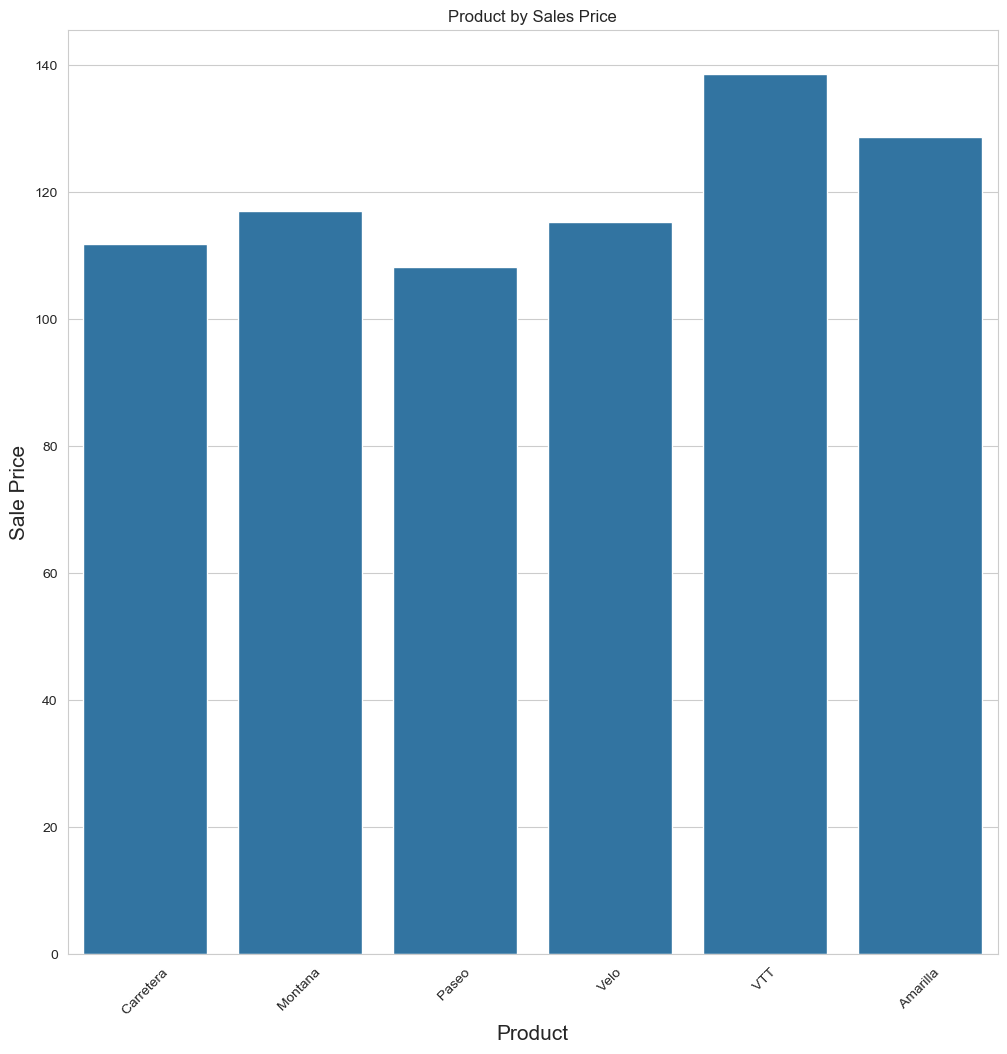

In [43]:
plt.figure(figsize=(12,12))
sns.barplot(x='Product', y='Sale Price', data = df, errorbar = None)
plt.title('Product by Sales Price')
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***Observe that VTT has the highest sales price. This explains why the product has the highest sales. Also Paseo has the lowest sales price of all the product which explains why it has the highest units of goods sold but generates low revenue.***

***3. Which country generates the highest sales??***

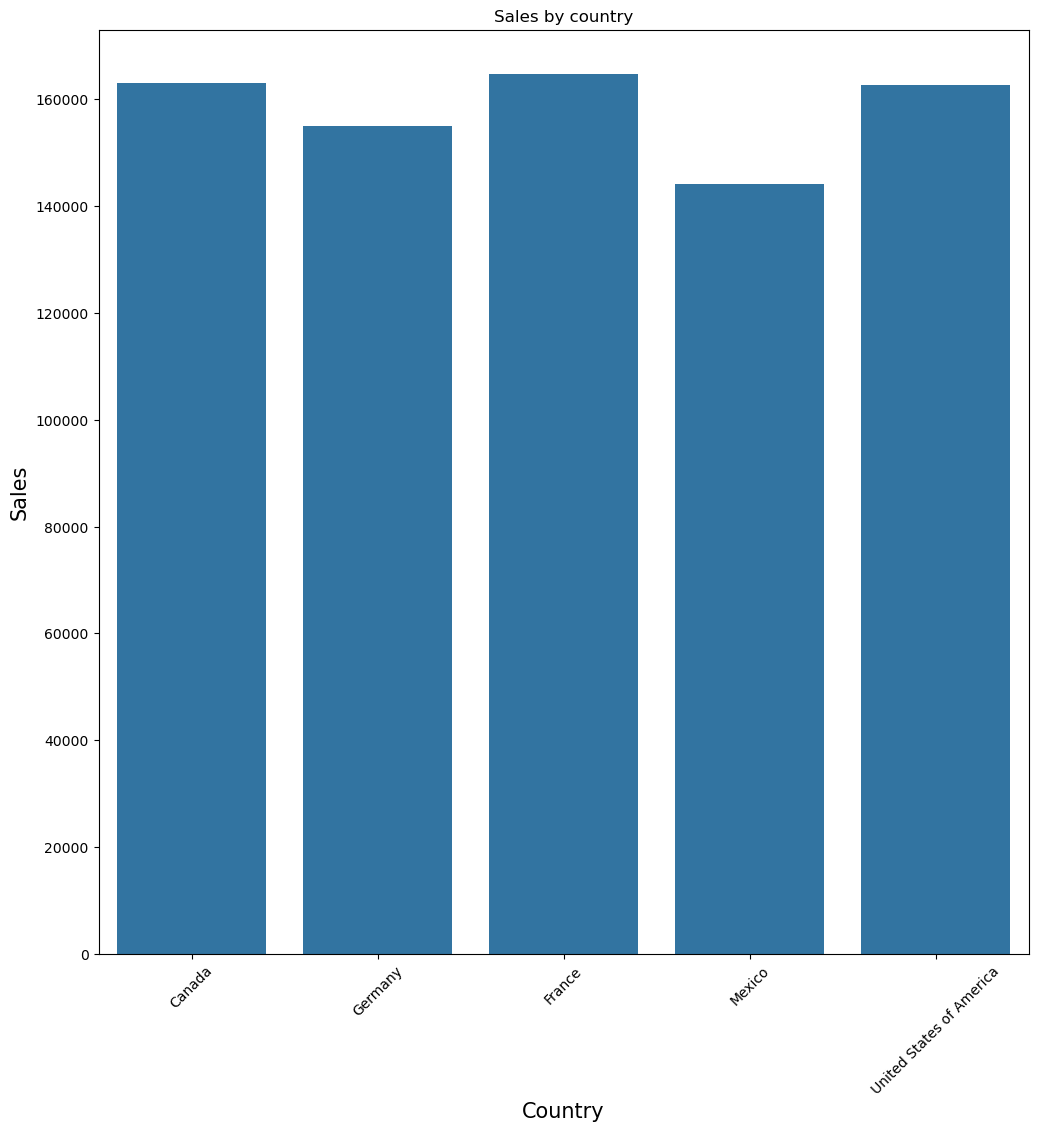

In [35]:
plt.figure(figsize=(12,12))
sns.barplot(x='Country', y='Sales', data = df, errorbar = None)
plt.title('Sales by country')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***From the above chart we can observe the country with the highest sales is France,Canada,USA,German and Mexico. The company should increase the supply of goods to France and Canada. The should also perform a study inorder to understand what causes high revenues in France and Canada and apply in the other countries.Conclusion France generates the highest revenue for the company.***

***4. Which products generate highest profits***

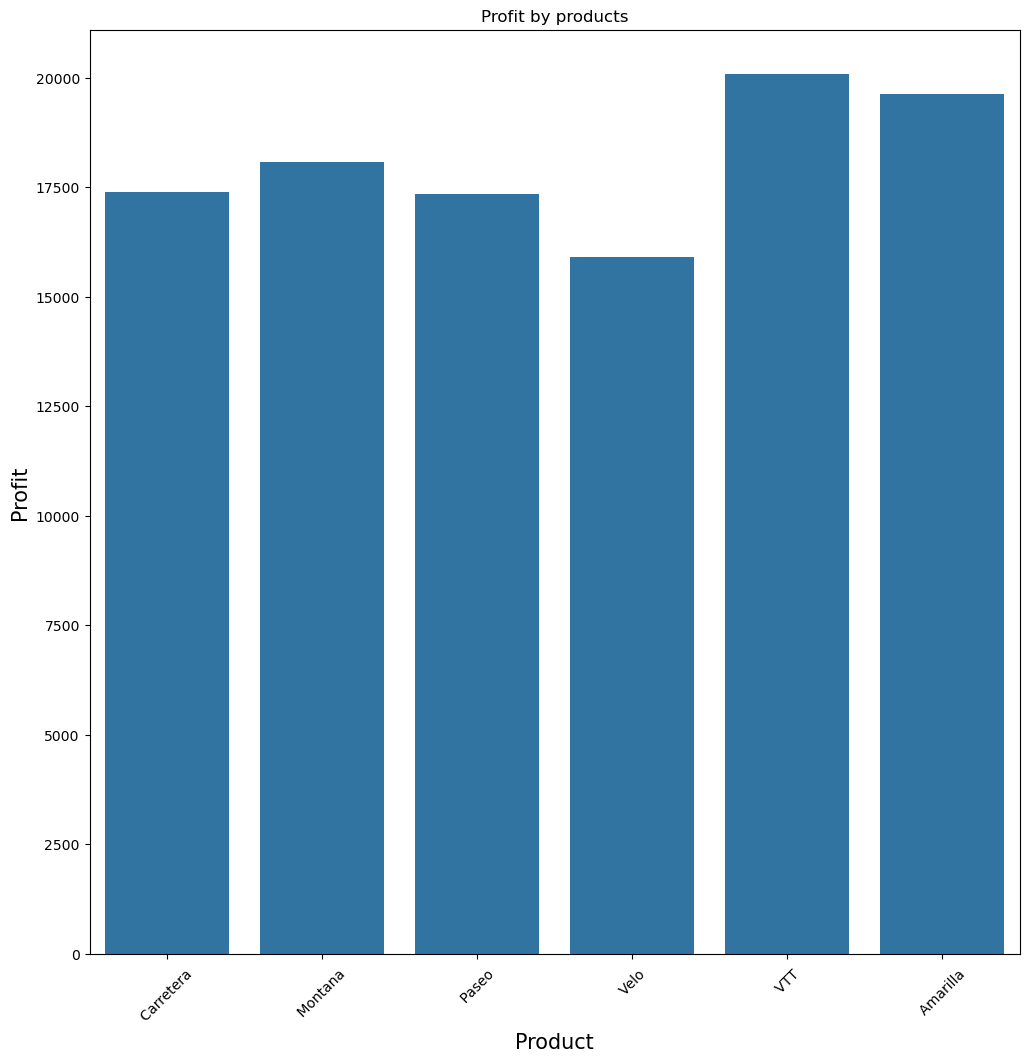

In [36]:
plt.figure(figsize=(12,12))
sns.barplot(x='Product', y='Profit', data = df, errorbar = None)
plt.title('Profit by products')
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***Observe that VTT is leading with profits followed by Amarilla then Montanna then  Carretera then Paseo and lastly Velo. The company oughts to increase the products of VTT and Amarilla.Conclusion VTT and Amarilla generate the highest profit margins.***

***Check if manufacturing price could be the reason for high profits generated by VTT***

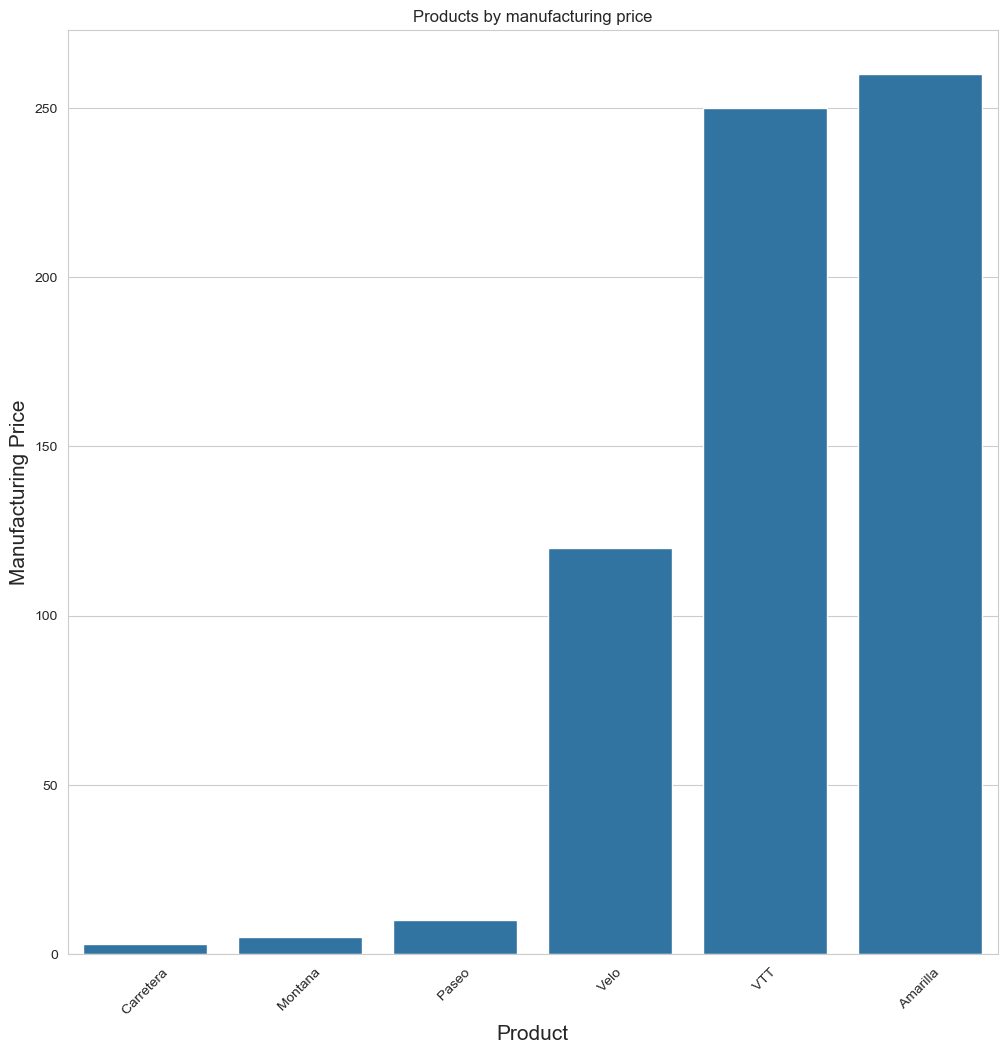

In [44]:
plt.figure(figsize=(12,12))
sns.barplot(x='Product', y='Manufacturing Price', data = df, errorbar = None)
plt.title('Products by manufacturing price')
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Manufacturing Price', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***Observe that Carretera has the lowest manufacturing price.This clearly indicates that low manufacturing price does not necessarily mean high profits.***

***5. Country with the highest profit margins***

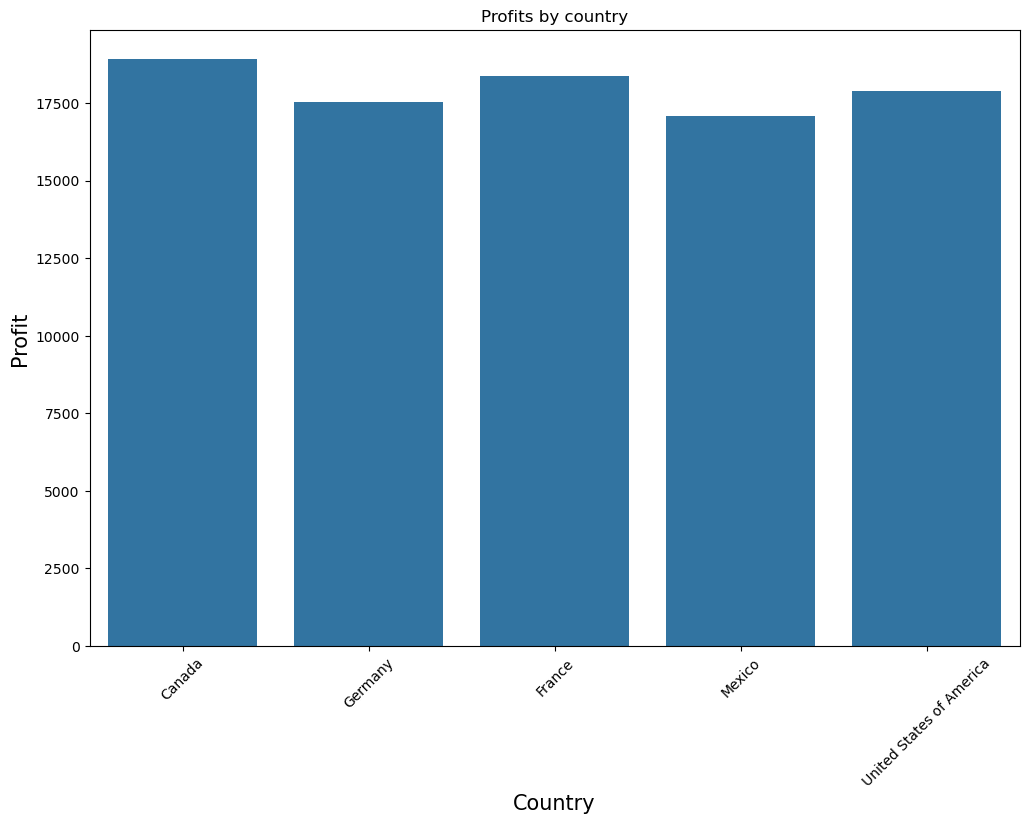

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='Profit', data = df, errorbar = None)
plt.title('Profits by country')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***Canada,France, USA, Germany, Mexico have the highest profits repectively. The company should increase their supply to Canada and France. The company should aslo carry out astudy to understand the factors that are causing profits in Canada and use it for the other countries.***

***6. Which product has the highest sales in every country.***

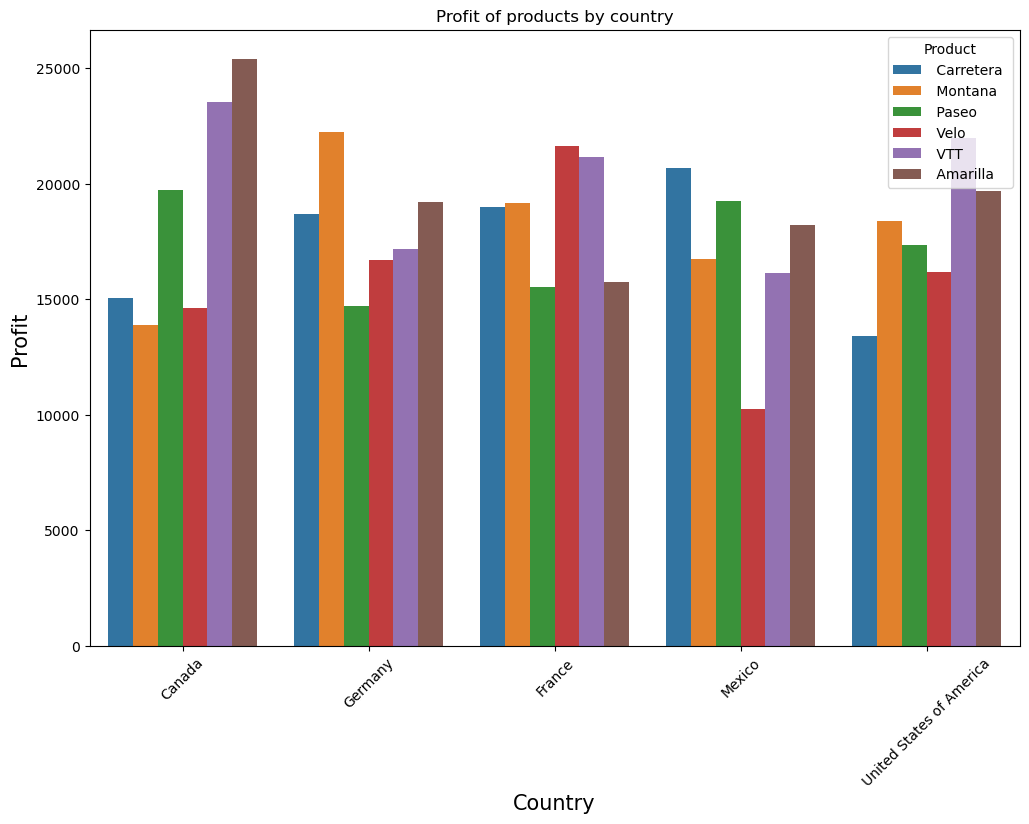

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='Profit',hue='Product', data = df, errorbar = None)
plt.title('Profit of products by country')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***Breaking the profits down to every country we can see that every country has different prouduct that generate highest profit margins.
 Canada -Amarilla
 Germany - Montana
 France - Velo
 Mexico - Carretera
 USA - VTT 
The company should increase the supply of Amarilla in Canada, supply of Montana in Germany , supply of Velo in France, Carretera in Mexico and VTT in USA to generate high revenues.
Conclusion is that each country has unique products that generate profits.***

***7. Sales by each product per country.***

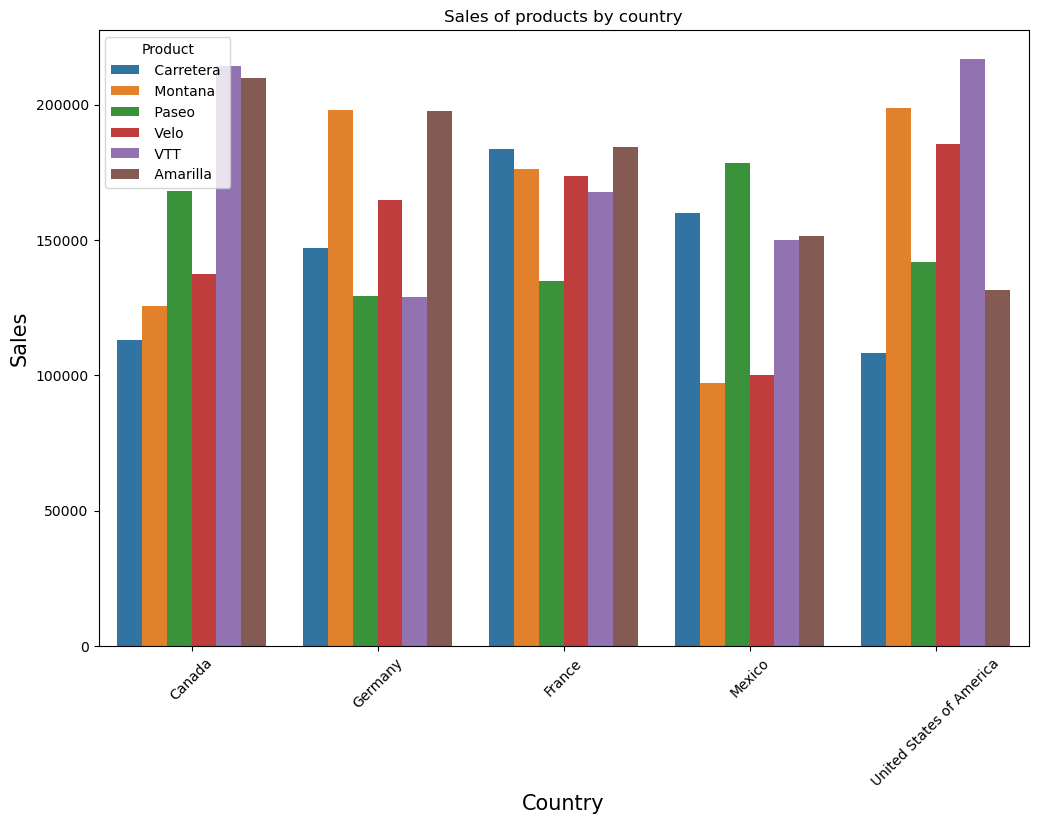

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x='Country', y='Sales',hue='Product', data = df, errorbar = None)
plt.title('Sales of products by country')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***We observe that products that have the highest sales happen not to be the ones with the highest profit margins. Specifically for Canada,France and Mexico. This may be due to high manufacturing cost, cost of the goods, cost of distribution etc. The company should do some analysis and find out the key reason to this observation.***

***8. Sales by Month***

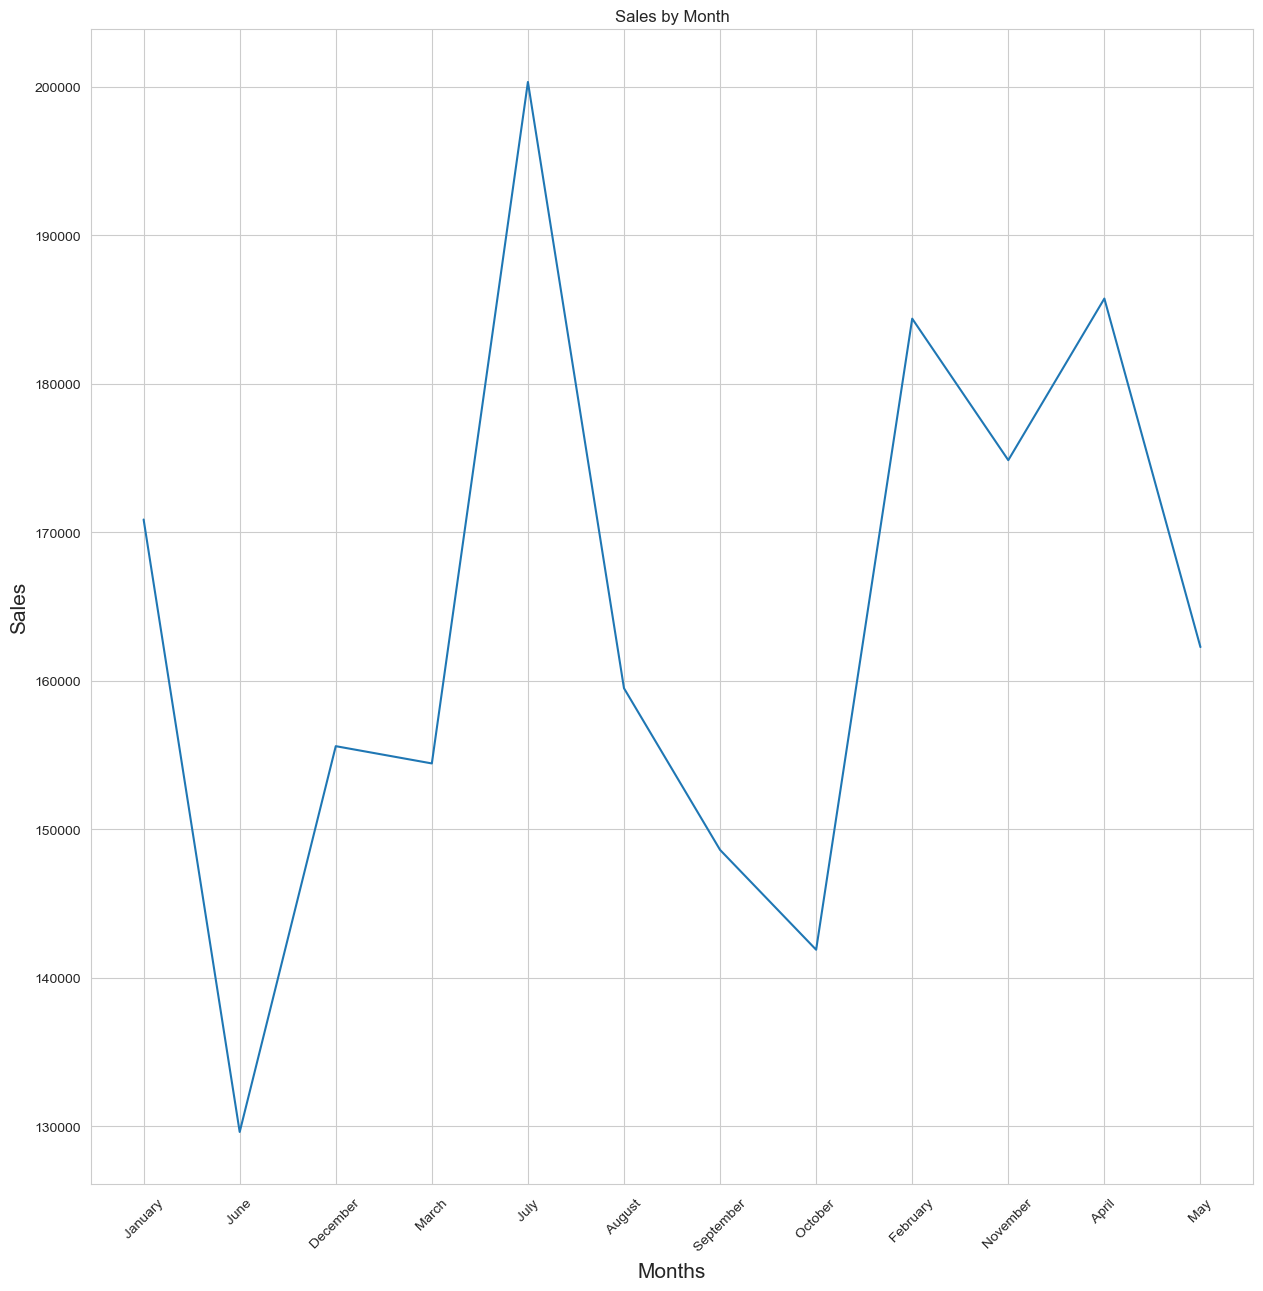

In [40]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.lineplot(x='Month Name', y='Sales', data = df, errorbar = None)
plt.title('Sales by Month')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***July has the highest sales on average while June had the lowest sales on average.***

***9. Profit by Month.***

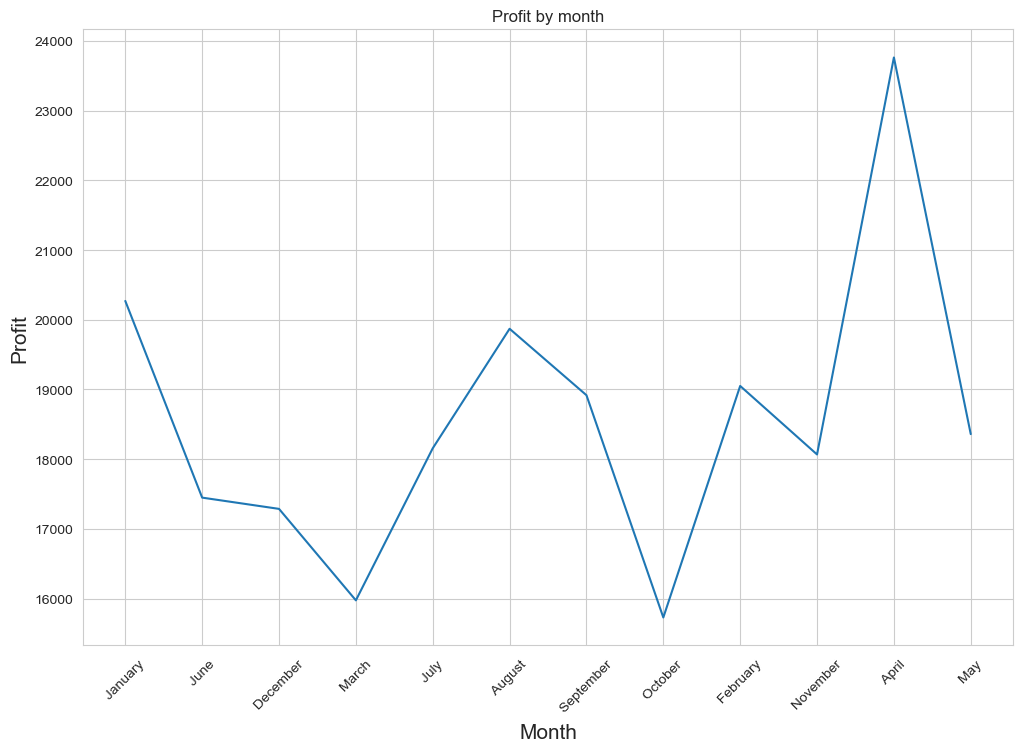

In [41]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month Name', y='Profit', data = df, errorbar = None)
plt.title('Profit by month')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

***April was the month which recorded the highest profit while October recorded the lowest profit margins.***

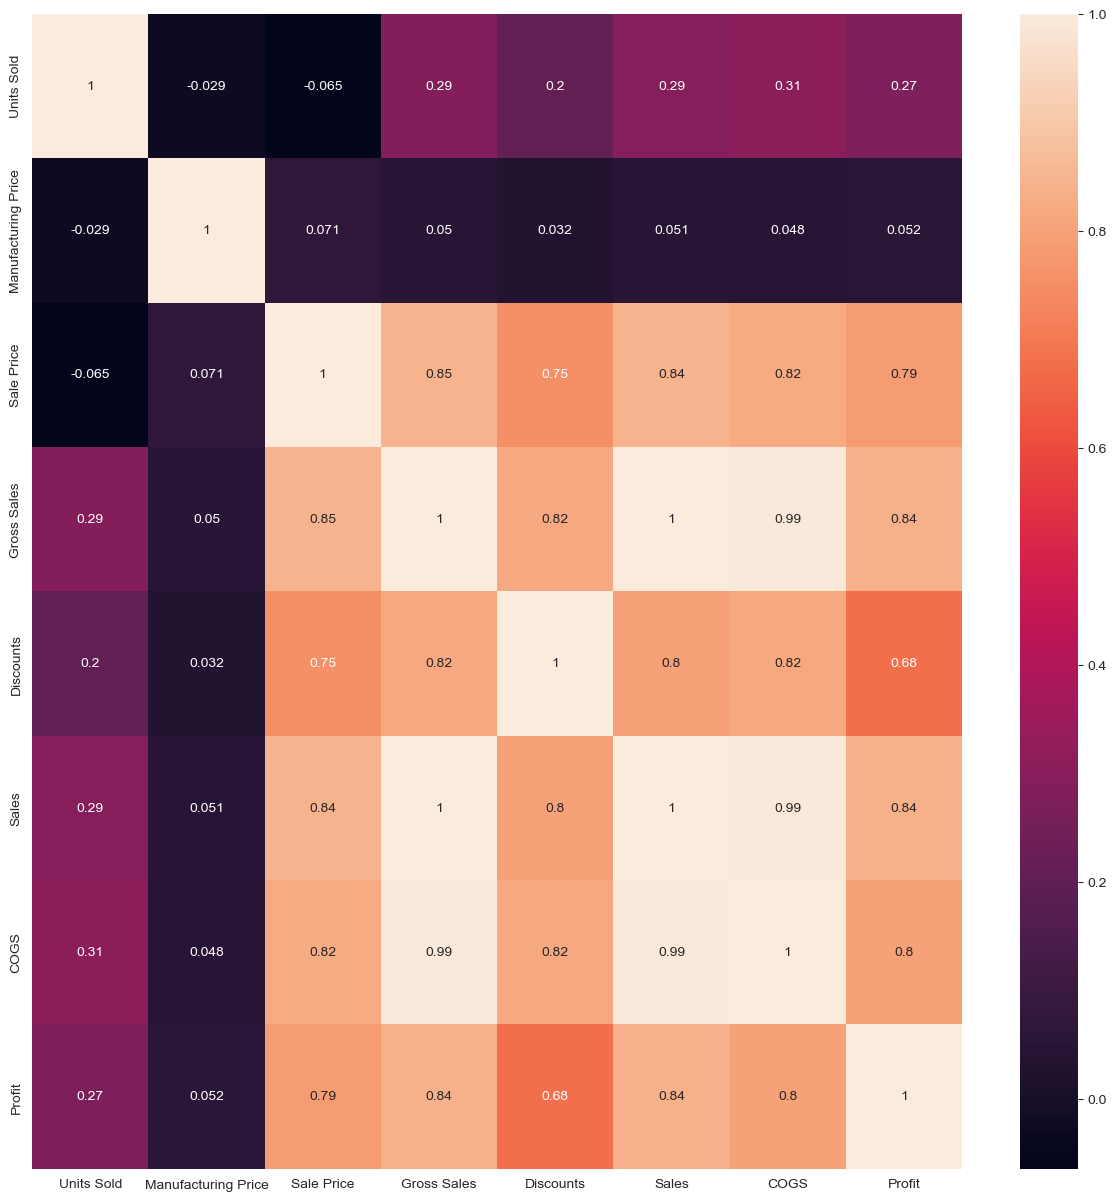

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num_columns].corr(), annot = True)
plt.show()
